In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt

In [2]:
#Reading artworks file
dataset = pd.read_csv(r"C:\Users\parij\Downloads\ecommerce dataset\data.csv", encoding="ISO-8859-1")
data = pd.DataFrame(dataset)

## Exploratory Data Analysis & Cleaning

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2022 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2022 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2022 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2022 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2022 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2023 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2023 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2023 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2023 12:50,4.15,12680.0,France


In [4]:
data.shape

(541909, 8)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
ecom_data = data.drop_duplicates(subset = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country'], inplace = False)

In [10]:
ecom_data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [12]:
# Converting to datetime format
ecom_data['InvoiceDate'] = pd.to_datetime(ecom_data['InvoiceDate'],format='mixed')

C:\Users\parij\AppData\Local\Temp\ipykernel_44944\148345498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_data['InvoiceDate'] = pd.to_datetime(ecom_data['InvoiceDate'],format='mixed')


In [13]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


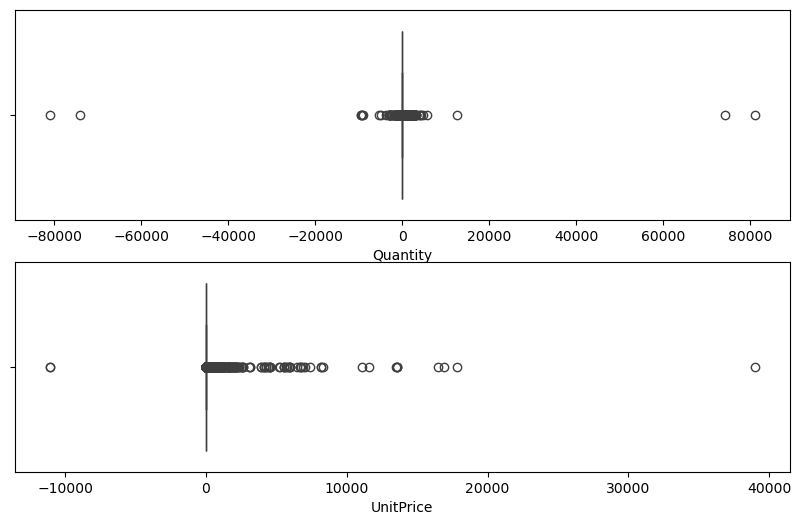

In [14]:
# Checking for outliers in the numeric data
fig,axes = plt.subplots(2,figsize=(10,6))
sns.boxplot(x=ecom_data['Quantity'],ax = axes[0])
sns.boxplot(x=ecom_data['UnitPrice'], ax = axes[1])
plt.show()

In [15]:
# Checking the data for negative quantity numbers
negative_quantity = ecom_data[(ecom_data['Quantity']<0)]
negative_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2022-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2022-12-01 12:38:00,4.25,17897.0,United Kingdom


In [16]:
# Checking the data for positive quantity numbers
positive_quantity = ecom_data[(ecom_data['Quantity']>0)]
positive_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047.0,United Kingdom


### From the analysis it seems, a negative quantity and a 'C' is added to the start of the invoice number, maybe representing some kind of cancelled, return or refund order. 

In [17]:
# Checking the data for negative Unit Price numbers
negative_price = ecom_data[(ecom_data['UnitPrice']<0)]
negative_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2023-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2023-08-12 14:52:00,-11062.06,NaN,United Kingdom


### The negative Unit price is used to adjust the debt.

In [18]:
# Removing debt prices as that is not needed for analysis right now
ecom_data_clean = ecom_data[ecom_data['UnitPrice']>=0]
ecom_data_clean = ecom_data_clean[ecom_data_clean['Description']!='Adjust bad debt']

In [19]:
# Fresh data cleaned from duplicates and begative unit prices
ecom_data_clean_dummy = ecom_data_clean.copy()

In [20]:
ecom_data_clean_dummy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


### Analysing canceled orders

In [21]:
ecom_data_clean_dummy['Status'] = ecom_data_clean_dummy.apply(lambda row: 'Cancelled' if row['Quantity'] < 0 else 'Placed', axis=1)
canceled_orders = ecom_data_clean_dummy[ecom_data_clean_dummy['InvoiceNo'].astype(str).str.startswith('C')]
canceled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom,Cancelled
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom,Cancelled
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom,Cancelled
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled


In [22]:
purchased_orders =  ecom_data_clean_dummy[~ecom_data_clean_dummy['InvoiceNo'].astype(str).str.startswith('C')]
purchased_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,Placed
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,Placed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,Placed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,Placed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,Placed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,Placed


In [23]:
# Joining 2 datasets on primary keys to get the orders that are initially purchased and then cancelled afterwards
merged_df = canceled_orders.merge(
    purchased_orders,
    on=['StockCode','Description','UnitPrice', 'CustomerID'],
    suffixes=('_canceled', '_purchased'),
    how='left'
)

In [24]:
# Number of total canceled orders
merged_df.shape

(22475, 14)

In [25]:
# Adding the type of cancellation to the orders 
merged_df['Cancellation_Type'] = merged_df.apply(
    lambda row: 'Fully Canceled' if abs(row['Quantity_canceled']) == row['Quantity_purchased'] 
    else 'Partially Canceled',
    axis=1
)

In [26]:
merged_df

,InvoiceNo_canceled,StockCode,Description,Quantity_canceled,InvoiceDate_canceled,UnitPrice,CustomerID,Country_canceled,Status_canceled,InvoiceNo_purchased,Quantity_purchased,InvoiceDate_purchased,Country_purchased,Status_purchased,Cancellation_Type
0,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom,Cancelled,NaN,NaN,NaT,NaN,NaN,Partially Canceled
1,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,537195,12.0,2022-12-05 13:55:00,United Kingdom,Placed,Partially Canceled
2,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,538651,12.0,2022-12-13 15:07:00,United Kingdom,Placed,Partially Canceled
3,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,540157,12.0,2023-01-05 11:41:00,United Kingdom,Placed,Partially Canceled
4,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled,541293,12.0,2023-01-17 13:39:00,United Kingdom,Placed,Partially Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22470,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom,Cancelled,581571,8.0,2023-12-09 12:00:00,United Kingdom,Placed,Partially Canceled
22471,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled,539404,6.0,2022-12-17 12:24:00,United Kingdom,Placed,Partially Canceled
22472,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled,550828,6.0,2023-04-21 10:19:00,United Kingdom,Placed,Partially Canceled
22473,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom,Cancelled,566624,12.0,2023-09-14 09:36:00,United Kingdom,Placed,Partially Canceled


In [27]:
merged_df.to_excel('Cancelled_orders.xlsx')

In [28]:
# Type of orders canceled
print(merged_df['Cancellation_Type'].value_counts())

Cancellation_Type
Partially Canceled    16634
Fully Canceled         5841
Name: count, dtype: int64


In [29]:
# Cancellation rate
cancellation_rate = merged_df.groupby('StockCode')['Cancellation_Type'].value_counts(normalize=True) * 100
print(cancellation_rate)

StockCode  Cancellation_Type 
10133      Fully Canceled        100.000000
10135      Partially Canceled    100.000000
11001      Partially Canceled    100.000000
15034      Partially Canceled     60.000000
           Fully Canceled         40.000000
                                    ...    
M          Fully Canceled         23.809524
POST       Partially Canceled     73.011364
           Fully Canceled         26.988636
S          Partially Canceled     98.333333
           Fully Canceled          1.666667
Name: proportion, Length: 2929, dtype: float64


In [30]:
# Customers who frequently cancel
frequent_cancellers = merged_df['CustomerID'].value_counts().head(10)
print(frequent_cancellers)

CustomerID
17841.0    1853
14911.0    1430
15311.0     561
13767.0     491
13798.0     417
12471.0     379
17511.0     311
14606.0     296
13089.0     225
14796.0     207
Name: count, dtype: int64


### Anomalous Orders / Fraud Detection

In [31]:
# Orders with purchase qauntity less than the cancelled quantity
anomalous_returns = merged_df[abs(merged_df['Quantity_canceled']) > abs(merged_df['Quantity_purchased'])]
anomalous_returns

,InvoiceNo_canceled,StockCode,Description,Quantity_canceled,InvoiceDate_canceled,UnitPrice,CustomerID,Country_canceled,Status_canceled,InvoiceNo_purchased,Quantity_purchased,InvoiceDate_purchased,Country_purchased,Status_purchased,Cancellation_Type
16,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2022-12-01 14:30:00,0.85,17841.0,United Kingdom,Cancelled,540021,1.0,2023-01-04 12:51:00,United Kingdom,Placed,Partially Canceled
17,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2022-12-01 14:30:00,0.85,17841.0,United Kingdom,Cancelled,540538,1.0,2023-01-09 14:36:00,United Kingdom,Placed,Partially Canceled
19,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2022-12-01 14:30:00,0.85,17841.0,United Kingdom,Cancelled,544311,1.0,2023-02-17 14:19:00,United Kingdom,Placed,Partially Canceled
28,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2022-12-01 14:30:00,0.85,17841.0,United Kingdom,Cancelled,550006,1.0,2023-04-14 10:10:00,United Kingdom,Placed,Partially Canceled
31,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2022-12-01 14:30:00,0.85,17841.0,United Kingdom,Cancelled,551558,1.0,2023-05-03 10:41:00,United Kingdom,Placed,Partially Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22212,C580912,22041,"RECORD FRAME 7"" SINGLE SIZE",-24,2023-12-06 13:37:00,2.55,12989.0,United Kingdom,Cancelled,543935,6.0,2023-02-14 14:39:00,United Kingdom,Placed,Partially Canceled
22218,C580913,22536,MAGIC DRAWING SLATE PURDEY,-120,2023-12-06 13:41:00,0.36,17857.0,United Kingdom,Cancelled,546926,100.0,2023-03-18 10:11:00,United Kingdom,Placed,Partially Canceled
22219,C580913,22536,MAGIC DRAWING SLATE PURDEY,-120,2023-12-06 13:41:00,0.36,17857.0,United Kingdom,Cancelled,551576,60.0,2023-05-03 11:19:00,United Kingdom,Placed,Partially Canceled
22321,C581117,23311,VINTAGE CHRISTMAS STOCKING,-2,2023-12-07 12:24:00,2.55,16393.0,United Kingdom,Cancelled,560688,1.0,2023-07-20 11:54:00,United Kingdom,Placed,Partially Canceled


In [32]:
# Number of orders which are anomalous
anomalous_returns.shape

(1563, 15)

In [33]:
# Top problematic product
anomalous_returns['StockCode'].value_counts().head(10)

StockCode
21927     72
21212     47
22423     44
47566     32
85123A    30
84879     29
22630     25
23148     22
23263     22
POST      20
Name: count, dtype: int64

### Analysing Orders with no cost

In [34]:
# Analysing orders that has 0 unit price, but positive quantity
free_orders = ecom_data_clean_dummy[(ecom_data_clean_dummy['Quantity'] > 0) & (ecom_data_clean_dummy['UnitPrice']==0)]
free_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.0,NaN,United Kingdom,Placed
1970,536545,21134,NaN,1,2022-12-01 14:32:00,0.0,NaN,United Kingdom,Placed
1971,536546,22145,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom,Placed
1972,536547,37509,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom,Placed
1987,536549,85226A,NaN,1,2022-12-01 14:34:00,0.0,NaN,United Kingdom,Placed
...,...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2023-12-07 18:36:00,0.0,NaN,United Kingdom,Placed
536981,581234,72817,NaN,27,2023-12-08 10:33:00,0.0,NaN,United Kingdom,Placed
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2023-12-08 13:58:00,0.0,NaN,United Kingdom,Placed
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2023-12-08 13:58:00,0.0,NaN,United Kingdom,Placed


In [35]:
# products given for free the most
free_orders['StockCode'].value_counts().head(10)

StockCode
23084    13
35965    11
22676     9
22683     8
20713     8
22666     7
22084     7
22679     7
21116     7
79321     7
Name: count, dtype: int64

In [36]:
# Are these linked to specific customers?
free_orders['CustomerID'].value_counts().head(10)

CustomerID
14646.0    4
13081.0    4
12415.0    2
13985.0    2
14911.0    2
16406.0    1
12444.0    1
12603.0    1
15602.0    1
12748.0    1
Name: count, dtype: int64

### Analysing orders with no cost and negative quantities

In [37]:
# Merging unusual orders (No 'C' invoice number, negative quantity and zero unit price) with original orders
unusual_negatives = ecom_data_clean_dummy[
    (~ecom_data_clean_dummy['InvoiceNo'].astype(str).str.startswith('C')) &
    (ecom_data_clean_dummy['Quantity'] < 0) &
    (ecom_data_clean_dummy['UnitPrice'] == 0)
]
unusual_merged = unusual_negatives.merge(
    ecom_data_clean_dummy,
    on=['StockCode', 'Description','CustomerID'],
    suffixes=('_negative', '_original'),
    how='left'
)

In [38]:
unusual_merged

,InvoiceNo_negative,StockCode,Description,Quantity_negative,InvoiceDate_negative,UnitPrice_negative,CustomerID,Country_negative,Status_negative,InvoiceNo_original,Quantity_original,InvoiceDate_original,UnitPrice_original,Country_original,Status_original
0,536589,21777,NaN,-10,2022-12-01 16:50:00,0.0,NaN,United Kingdom,Cancelled,536589,-10,2022-12-01 16:50:00,0.0,United Kingdom,Cancelled
1,536589,21777,NaN,-10,2022-12-01 16:50:00,0.0,NaN,United Kingdom,Cancelled,537361,5,2022-12-06 12:34:00,0.0,United Kingdom,Placed
2,536764,84952C,NaN,-38,2022-12-02 14:42:00,0.0,NaN,United Kingdom,Cancelled,536764,-38,2022-12-02 14:42:00,0.0,United Kingdom,Cancelled
3,536764,84952C,NaN,-38,2022-12-02 14:42:00,0.0,NaN,United Kingdom,Cancelled,536765,19,2022-12-02 14:43:00,0.0,United Kingdom,Placed
4,536996,22712,NaN,-20,2022-12-03 15:30:00,0.0,NaN,United Kingdom,Cancelled,536996,-20,2022-12-03 15:30:00,0.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,581210,23395,check,-26,2023-12-07 18:36:00,0.0,NaN,United Kingdom,Cancelled,581210,-26,2023-12-07 18:36:00,0.0,United Kingdom,Cancelled
1997,581212,22578,lost,-1050,2023-12-07 18:38:00,0.0,NaN,United Kingdom,Cancelled,581212,-1050,2023-12-07 18:38:00,0.0,United Kingdom,Cancelled
1998,581213,22576,check,-30,2023-12-07 18:38:00,0.0,NaN,United Kingdom,Cancelled,581213,-30,2023-12-07 18:38:00,0.0,United Kingdom,Cancelled
1999,581226,23090,missing,-338,2023-12-08 09:56:00,0.0,NaN,United Kingdom,Cancelled,581226,-338,2023-12-08 09:56:00,0.0,United Kingdom,Cancelled


In [39]:
# No. of orders with this mistake where order quantity purchased (non-zero unit price) is less than returned (zero unit price)
unusual_merged[((abs(unusual_merged['Quantity_negative'])) > (unusual_merged['Quantity_original'])) & (unusual_merged['UnitPrice_original']>0)].shape

(0, 15)

## Analysing Basic Trends and Revenue

In [40]:
# New cleaned dataframe with no cancellation or anomoly orders

# Using same columns in both dataframes to join them
columns_to_match = ['StockCode', 'Description','CustomerID', 'UnitPrice']

# Performing an anti-join to remove records from ecom_data_clean_dummy that exist in merged_df
success_order_data = ecom_data_clean_dummy.merge(merged_df[columns_to_match], on=columns_to_match, how='left', indicator=True)

# Keeping only the rows that do NOT appear in merged_df
success_order_data = success_order_data[success_order_data['_merge'] == 'left_only'].drop(columns=['_merge'])

# Removing zero unit price orders
success_order_data = success_order_data[success_order_data['UnitPrice'] > 0]

success_order_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,Placed
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,Placed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed
...,...,...,...,...,...,...,...,...,...
765585,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,Placed
765586,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,Placed
765587,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,Placed
765588,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,Placed


In [41]:
# Top items with most cost
top_sold_items = success_order_data.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False)
top_sold_items

Description
PICNIC BASKET WICKER 60 PIECES        649.500000
DOTCOM POSTAGE                        293.782920
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    157.500000
REGENCY MIRROR WITH SHUTTERS          156.428571
VINTAGE BLUE KITCHEN CABINET          152.187500
                                         ...    
BLUE STONES ON WIRE FOR CANDLE          0.102941
WRAP BAD HAIR DAY                       0.100000
PIECE OF CAMO STATIONERY SET            0.097333
POPART WOODEN PENCILS ASST              0.043478
PADS TO MATCH ALL CUSHIONS              0.001000
Name: UnitPrice, Length: 4017, dtype: float64

In [42]:
# Most bought item from the store
success_order_data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2113
JUMBO BAG RED RETROSPOT               1988
PARTY BUNTING                         1631
REGENCY CAKESTAND 3 TIER              1603
LUNCH BAG RED RETROSPOT               1436
                                      ... 
GARLAND, MAGIC GARDEN 1.8M               1
LILAC FEATHERS CURTAIN                   1
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
Name: count, Length: 4017, dtype: int64

In [43]:
# Most frequent buying customer ID in the store
success_order_data['CustomerID'].value_counts()

CustomerID
17841.0    6389
14096.0    5111
14911.0    4606
12748.0    4323
14606.0    2438
           ... 
17956.0       1
17986.0       1
13099.0       1
16737.0       1
15753.0       1
Name: count, Length: 4319, dtype: int64

In [44]:
# Most active countries buying from the store
success_order_data['Country'].value_counts()

Country
United Kingdom          466254
Germany                   8238
France                    8081
EIRE                      6653
Spain                     2425
Netherlands               2332
Belgium                   1975
Switzerland               1902
Portugal                  1473
Australia                 1095
Norway                    1049
Channel Islands            735
Italy                      705
Finland                    663
Cyprus                     593
Sweden                     430
Unspecified                419
Austria                    397
Denmark                    370
Poland                     308
Israel                     292
Japan                      278
Hong Kong                  251
Singapore                  215
Iceland                    182
Canada                     151
Greece                     143
Malta                       99
United Arab Emirates        68
USA                         67
European Community          59
RSA                         57


<function matplotlib.pyplot.show(close=None, block=None)>

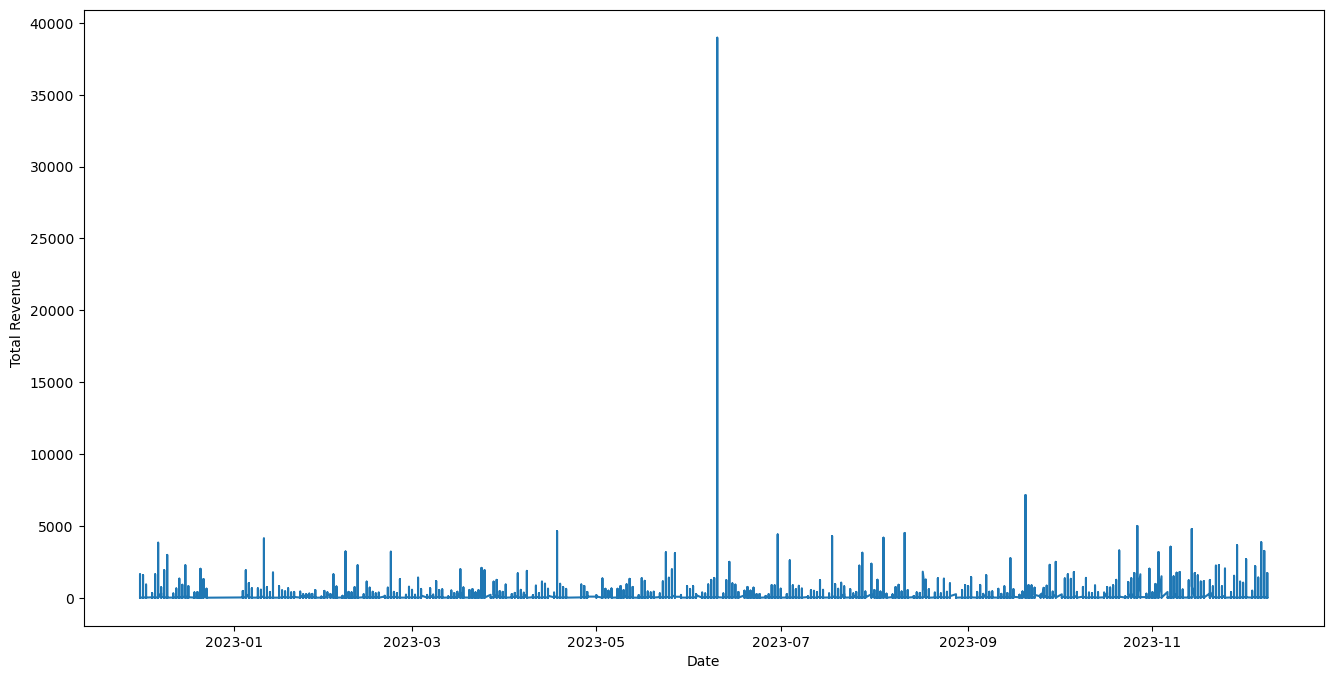

In [45]:
# Sales trend over time (InvoiceDate vs. total revenue)
plt.figure(figsize = (16,8))
success_order_data.loc[:,'date'] = success_order_data['InvoiceDate'].dt.date
plt.plot(success_order_data['date'],(success_order_data['UnitPrice']*success_order_data['Quantity']))
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show

### Customer Segmentation (RFM Analysis)

In [46]:
# Making a copy of the data frame
RFM_data = success_order_data.copy()

In [47]:
# Computing total spending per transaction
RFM_data['TotalPrice'] = RFM_data['Quantity'] * RFM_data['UnitPrice']

# Setting a reference date (latest purchase date in dataset)
reference_date = RFM_data['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Metrics Calculation
rfm = RFM_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (Number of unique purchases)
    'TotalPrice': 'sum'  # Monetary Value (Total spending)
}).reset_index()

# Renaming columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)

# Assigning RFM Scores (1 to 5 using quantiles)
rfm['R_Score'] = pd.cut(rfm['Recency'], bins = 5, labels=[5, 4, 3, 2, 1],include_lowest=True)
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5], include_lowest=True)

# Creating RFM Segment (Concatenating scores)
rfm['RFM_Segment'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(str).agg(''.join, axis=1)

# Assigning customer segments
def segment_customers(rfm_row):
    if rfm_row['R_Score'] == 5 and rfm_row['F_Score'] == 5:
        return 'Best Customers'
    elif rfm_row['R_Score'] == 1 and rfm_row['F_Score'] == 1:
        return 'Lost Customers'
    elif rfm_row['F_Score'] == 5:
        return 'Loyal Customers'
    elif rfm_row['R_Score'] == 5:
        return 'Recent Customers'
    elif rfm_row['M_Score'] == 5:
        return 'Big Spenders'
    else:
        return 'Regular Customers'

rfm['Segment'] = rfm.apply(segment_customers, axis=1)

In [56]:
rfm['Segment'].value_counts().reset_index()

,Segment,count
0,Recent Customers,2677
1,Regular Customers,1371
2,Lost Customers,269
3,Best Customers,2


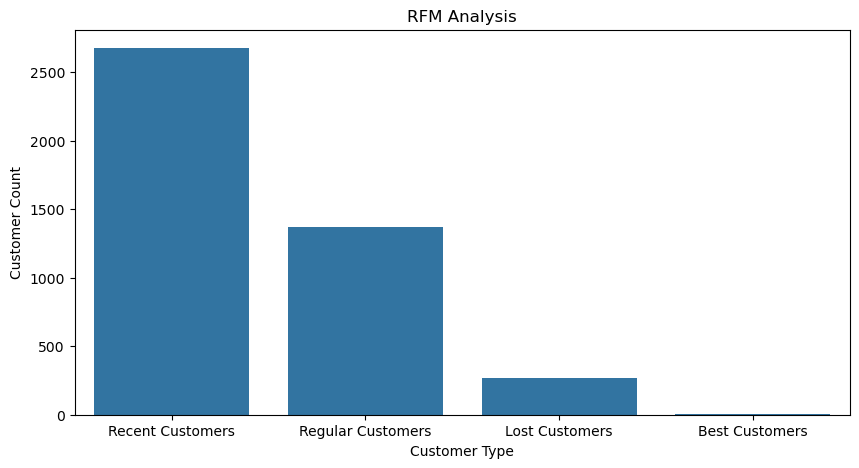

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Segment', y='count', data=rfm['Segment'].value_counts().reset_index())
plt.xlabel('Customer Type')
plt.ylabel('Customer Count')
plt.title('RFM Analysis')
plt.show()

### The RFM Analysis suggests that the number of best customers in the given time-span is lowest while Recent customers who are shopping more frequently is highest.

## Pricing Strategy Optimization

In [49]:
success_order_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,Placed,2022-12-01
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed,2022-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,Placed,2022-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed,2022-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Placed,2022-12-01


In [50]:
# Finding the most common price ranges where products are selling the most
success_order_data['Price_Range'] = pd.cut(success_order_data['UnitPrice'], bins=[0, 5, 10, 20, 50, 100, 500], 
                           labels=['0-5', '5-10', '10-20', '20-50', '50-100', '100+'])

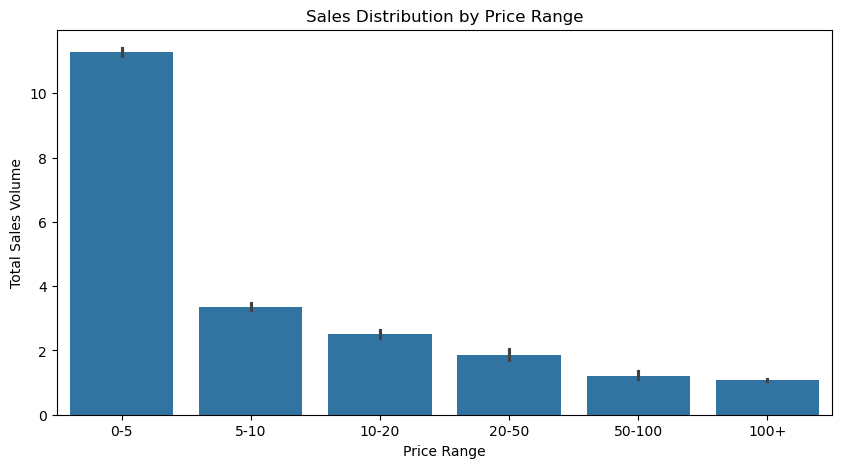

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Price_Range', y='Quantity', data=success_order_data)
plt.xlabel('Price Range')
plt.ylabel('Total Sales Volume')
plt.title('Sales Distribution by Price Range')
plt.show()

In [52]:
success_order_data.to_excel('succes_order_data.xlsx')